### Analysis of UK 2019 Accident dataset
##### The data come from the Open Data website of the UK government, where they have been published by the Department of Transport.

##### The dataset comprises of three csv files:


1.   Accident_data.csv: every line in the file represents a unique traffic accident (identified by the Accident_Index column), featuring various properties related to the accident as columns.
2.   Vehicle_data.csv: every line in the file represents the involvement of a unique vehicle in a unique traffic accident, featuring various vehicle and passenger properties as columns.
3.   Casuality_data.csv: every line in the file represents the involvement of a unique casuality in a unique traffic accident, featuring various vehicle and passenger properties as columns






In [1]:
# Import libraries necessary for this project

# Pandas, and NumPy: 
import numpy as np
import pandas as pd
from time import time
import math
# Plotly: 
# import plotly.plotly as py
# import plotly
# import plotly.graph_objs as go
# from plotly import tools
import csv
import folium
import matplotlib.pyplot as pl
import matplotlib.patches as mpatches
# folium: 
from folium import plugins
from folium.plugins import HeatMap

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import colorlover as cl
from IPython.display import HTML
from IPython.display import display

# Pretty display for notebooks
%matplotlib inline

###### Reading in the data

In [2]:
accidents_data = pd.read_csv("Road Safety Data - Accidents 2019.csv", parse_dates=['Date'], date_parser = pd.to_datetime)
casualties_data = pd.read_csv("Road Safety Data - Casualties 2019.csv")
vehicles_data = pd.read_csv("Road Safety Data- Vehicles 2019.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
display(accidents_data.head())

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,2019-02-18,...,0,5,1,1,1,0,0,1,3,E01004762
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,2019-01-15,...,-1,-1,4,1,1,0,0,1,3,E01003117
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,2019-01-01,...,0,0,4,1,1,0,0,1,1,E01000943
3,2019010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,2019-01-01,...,0,0,4,1,1,0,0,1,1,E01000973
4,2019010155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,2019-01-01,...,0,0,4,1,1,0,0,1,1,E01000546


In [4]:
accidents_data.isnull().sum()

Accident_Index                                    0
Location_Easting_OSGR                            28
Location_Northing_OSGR                           28
Longitude                                        28
Latitude                                         28
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                             63
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

In [5]:
casualties_data.isnull().sum()

Accident_Index                        0
Vehicle_Reference                     0
Casualty_Reference                    0
Casualty_Class                        0
Sex_of_Casualty                       0
Age_of_Casualty                       0
Age_Band_of_Casualty                  0
Casualty_Severity                     0
Pedestrian_Location                   0
Pedestrian_Movement                   0
Car_Passenger                         0
Bus_or_Coach_Passenger                0
Pedestrian_Road_Maintenance_Worker    0
Casualty_Type                         0
Casualty_Home_Area_Type               0
Casualty_IMD_Decile                   0
dtype: int64

In [6]:
vehicles_data.isnull().sum()

Accident_Index                      0
Vehicle_Reference                   0
Vehicle_Type                        0
Towing_and_Articulation             0
Vehicle_Manoeuvre                   0
Vehicle_Location-Restricted_Lane    0
Junction_Location                   0
Skidding_and_Overturning            0
Hit_Object_in_Carriageway           0
Vehicle_Leaving_Carriageway         0
Hit_Object_off_Carriageway          0
1st_Point_of_Impact                 0
Was_Vehicle_Left_Hand_Drive?        0
Journey_Purpose_of_Driver           0
Sex_of_Driver                       0
Age_of_Driver                       0
Age_Band_of_Driver                  0
Engine_Capacity_(CC)                0
Propulsion_Code                     0
Age_of_Vehicle                      0
Driver_IMD_Decile                   0
Driver_Home_Area_Type               0
Vehicle_IMD_Decile                  0
dtype: int64

**Testing cleaning**

## Data cleaning


First step in cleaning the accidents dataset is by cleaning all the null values for the features i.e Time, Longitue, Latitude, Location_Northing_OSGR, Location_Easting_OSGR, and LSOA_of_Accident_Location.
These can be grouped before applying the fill-forward and fill-backward method.
The grouping is done in other to replace the missing values with the most likely to be true value. 





In [7]:
#accident data
def clean_accident_data(df):
  df['LSOA_of_Accident_Location'] = df.groupby('Local_Authority_(District)')['LSOA_of_Accident_Location'].ffill().bfill()
  df['Time'] = df.groupby(['Light_Conditions', 'Date'])['Time'].ffill().bfill()
  df['Longitude'] = df.groupby('Local_Authority_(Highway)')['Longitude'].ffill().bfill()
  df['Latitude'] = df.groupby('Local_Authority_(Highway)')['Latitude'].ffill().bfill()
  df['Location_Northing_OSGR'] = df.groupby('Local_Authority_(Highway)')['Location_Northing_OSGR'].ffill().bfill()
  df['Location_Easting_OSGR'] = df.groupby('Local_Authority_(Highway)')['Location_Easting_OSGR'].ffill().bfill()
  return df
accidents_data = clean_accident_data(accidents_data)

accidents_data.head(5)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,2019-02-18,...,0,5,1,1,1,0,0,1,3,E01004762
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,2019-01-15,...,-1,-1,4,1,1,0,0,1,3,E01003117
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,2019-01-01,...,0,0,4,1,1,0,0,1,1,E01000943
3,2019010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,2019-01-01,...,0,0,4,1,1,0,0,1,1,E01000973
4,2019010155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,2019-01-01,...,0,0,4,1,1,0,0,1,1,E01000546


In [8]:
accidents_data.isnull().sum()

Accident_Index                                    0
Location_Easting_OSGR                             0
Location_Northing_OSGR                            0
Longitude                                         0
Latitude                                          0
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                              0
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

### Replacing values for accidents data
#### Steps
 
1. Replace the remaining null values for 'LSOA of Accident Location' feature with 'Scotland' since the values were not given for scotland






In [9]:
accidents_data['LSOA_of_Accident_Location'] = accidents_data['LSOA_of_Accident_Location'].replace(np.nan, 'Scotland')

accidents_data['LSOA_of_Accident_Location'].unique()


array(['E01004762', 'E01003117', 'E01000943', ..., 'W01001903',
       'W01000485', 'Scotland'], dtype=object)

In [10]:
display(vehicles_data.head())

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,1,9,0,-1,-1,-1,-1,-1,-1,...,6,1,58,9,-1,-1,-1,2,1,2
1,2019010128300,2,9,0,-1,-1,-1,-1,-1,-1,...,6,3,-1,-1,-1,-1,-1,2,1,2
2,2019010152270,1,9,0,18,-1,0,-1,-1,-1,...,6,2,24,5,-1,-1,-1,3,1,3
3,2019010152270,2,9,0,18,-1,0,-1,-1,-1,...,6,3,-1,-1,-1,-1,-1,6,1,6
4,2019010155191,1,9,0,3,0,1,0,0,0,...,6,1,45,7,-1,-1,-1,4,1,4


In [11]:
display(casualties_data.head())

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2019010128300,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2
1,2019010128300,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5
2,2019010128300,1,3,2,2,-1,-1,3,0,0,2,0,0,9,1,5
3,2019010152270,1,1,1,2,24,5,3,0,0,0,0,0,9,1,3
4,2019010155191,2,1,2,2,21,5,3,0,0,0,0,0,1,1,1


### Qa Finding the hours of the day on which accidents occur
##### let's look at what part of the day has the most accidents.

In [12]:
c_blue = '#00247d'
p_red = '#cf142b'

In [13]:
# converting the time into float instead of hour and minutes version in other to see accident occurence per time
accidents_data['time_conversion'] = pd.DatetimeIndex(accidents_data['Time']) 
accidents_data["time_to_float"] = accidents_data['time_conversion'].dt.hour + accidents_data['time_conversion'].dt.minute/60  # i.e 60 minutes makes 1hour
accidents_data["time_to_float"]

0         17.833333
1         21.750000
2          1.833333
3          1.333333
4          0.666667
            ...    
117531     1.000000
117532     8.766667
117533    15.500000
117534    14.166667
117535    12.750000
Name: time_to_float, Length: 117536, dtype: float64

###### Plotting the values above

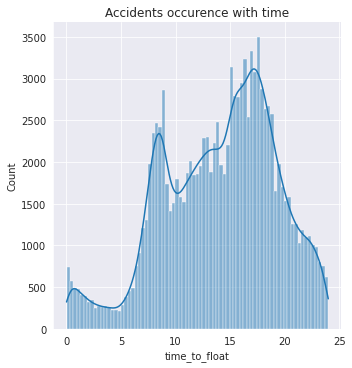

<Figure size 432x288 with 0 Axes>

In [14]:

%matplotlib inline
sns.set_style('darkgrid')
sns.displot(data=accidents_data,x=accidents_data["time_to_float"],kde=True)
plt.title('Accidents occurence with time')
plt.show()
plt.savefig('first_rush_hour.png')

##### Now, lets take a closer look into the hour of the day. Is it early morning rush, office hours, afternoon rush, evening or night?

In [15]:
#adding a new feature 'Hour' into the dataframe. This is gotten from 'Time' feature

accidents_data['Hour'] = accidents_data['Time'].str[0:2]

accidents_data['Hour'] = pd.to_numeric(accidents_data['Hour'])

accidents_data['Hour'] = accidents_data['Hour'].astype('int')
accidents_data.head(5)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,time_conversion,time_to_float,Hour
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,2019-02-18,...,1,1,0,0,1,3,E01004762,2022-05-16 17:50:00,17.833333,17
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,2019-01-15,...,1,1,0,0,1,3,E01003117,2022-05-16 21:45:00,21.750000,21
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,2019-01-01,...,1,1,0,0,1,1,E01000943,2022-05-16 01:50:00,1.833333,1
3,2019010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,2019-01-01,...,1,1,0,0,1,1,E01000973,2022-05-16 01:20:00,1.333333,1
4,2019010155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,2019-01-01,...,1,1,0,0,1,1,E01000546,2022-05-16 00:40:00,0.666667,0


In [16]:
# categorizing the hour
def when_was_it(hour):
  if hour >= 5 and hour < 10:
    return "morning rush (5-10)"
  elif hour >= 10 and hour < 15:
    return "office hours (10-15)"
  elif hour >= 15 and hour < 19:
    return "afternoon rush (15-19)"
  elif hour >= 19 and hour < 23:
    return "evening (19-23)"
  else:
    return "night (23-5)"

accidents_data['Daytime'] = accidents_data['Hour'].apply(when_was_it)
when_was_it_df = accidents_data[['Time', 'Hour', 'Daytime']]
when_was_it_df.head(10)

,Time,Hour,Daytime
0,17:50,17,afternoon rush (15-19)
1,21:45,21,evening (19-23)
2,01:50,1,night (23-5)
3,01:20,1,night (23-5)
4,00:40,0,night (23-5)
5,02:45,2,night (23-5)
6,01:35,1,night (23-5)
7,02:10,2,night (23-5)
8,01:15,1,night (23-5)
9,04:30,4,night (23-5)


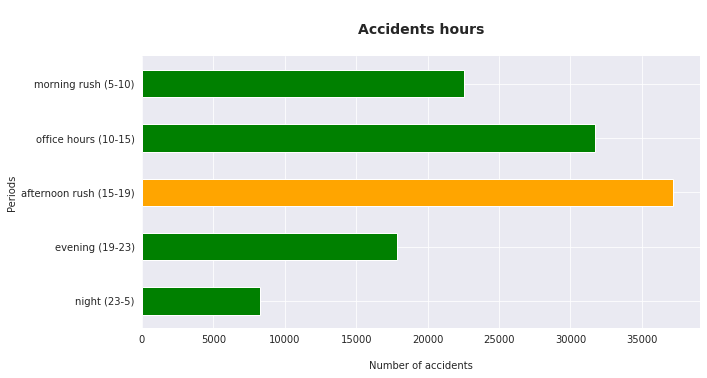

In [17]:
category = ['night (23-5)', 'evening (19-23)', 'afternoon rush (15-19)', 'office hours (10-15)', 'morning rush (5-10)']
accidents_df_sub = accidents_data.groupby('Daytime').size().reindex(category)


fig, ax = plt.subplots(figsize=(10, 5))
colors = ['green', 'green', 'orange', 'green', 'green']


accidents_df_sub.plot(kind='barh', ax=ax, color=colors)
ax.set_title('\nAccidents hours\n', fontsize=14, fontweight='bold')
ax.set(xlabel='\nNumber of accidents', ylabel='Periods')


sns.despine(top=True, right=True, left=True, bottom=True)

##### Finding the days of the week that accidents occur most

##### Calculating the total number of accident occurence per each day of the week

In [18]:
accidents_per_weekday = accidents_data.groupby('Day_of_Week').size().reset_index(name='Count')
accidents_per_weekday['Day_of_Week'] = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
accidents_per_weekday.set_index('Day_of_Week', inplace=True)
accidents_per_weekday

,Count
Day_of_Week,
Sunday,12935
Monday,16643
Tuesday,17598
Wednesday,17775
Thursday,17973
Friday,19056
Saturday,15556


##### Visualizing the highest number of accident occurence in week days

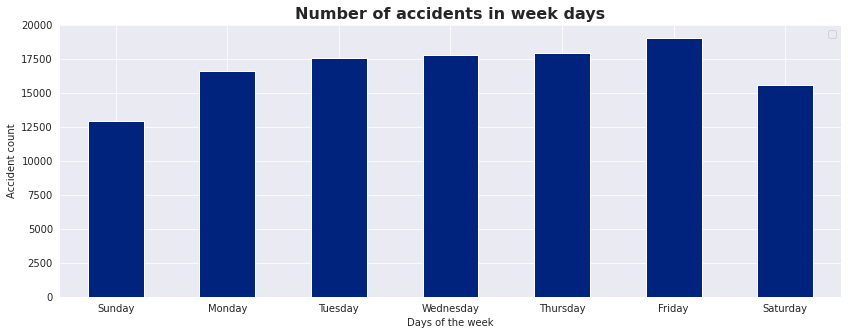

In [19]:
%matplotlib inline
accidents_per_weekday.plot(kind='bar', color=c_blue, figsize=(14,5))
plt.title('Number of accidents in week days', fontsize=16, fontweight='bold')
plt.xlabel('Days of the week')
plt.ylabel('Accident count')
plt.xticks(rotation='horizontal')
plt.legend('')
sns.despine(top=True, bottom=False, left=True, right=True);

###### Calculating the Average number of accidents for all week days

In [20]:
# Get daily time series and convert to a dataframe
total_weekday = pd.DataFrame(accidents_data.set_index('Date').resample('1d').size().reset_index())
total_weekday.columns = ['Date', 'Count']
weekdays = total_weekday['Date'].dt.day_name()

In [21]:
# Group by weekdays and get daily average
weekday_avg = total_weekday.groupby(weekdays)['Count'].mean().reset_index()
weekday_avg.columns = ['Weekday', 'Avg_Accidents']
weekday_avg.set_index('Weekday', inplace=True)
weekday_avg

,Avg_Accidents
Weekday,
Friday,348.884615
Monday,315.384615
Saturday,311.423077
Sunday,280.480769
Thursday,340.692308
Tuesday,331.452830
Wednesday,325.615385


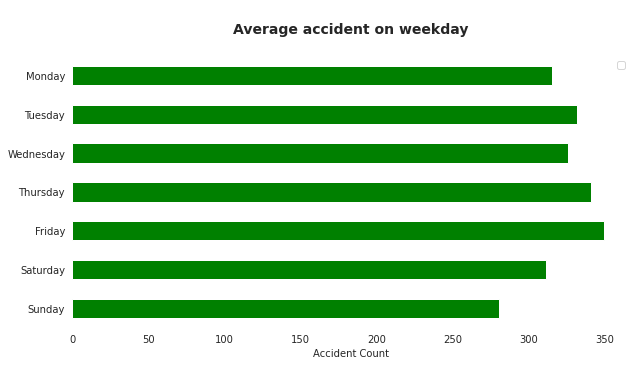

In [22]:
days = ['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday']


sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,5))


weekday_avg.reindex(days).plot(kind='barh', color='green', ax=ax)
ax.set_title('\nAverage accident on weekday\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Accident Count', ylabel='')
ax.legend('')


sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

### Qb Finding the hours of the day and day of the week on which accidents occur for motorbikes
##### let's look at what part of the day has the most accidents.

In [23]:
vehicle1 = vehicles_data[(vehicles_data["Vehicle_Type"]==2)]
vehicle2 = vehicles_data[(vehicles_data["Vehicle_Type"]==3)]
vehicle3 = vehicles_data[(vehicles_data["Vehicle_Type"]==4)]
vehicle4 = vehicles_data[(vehicles_data["Vehicle_Type"]==5)]
vehicle5 = vehicles_data[(vehicles_data["Vehicle_Type"]==23)]
vehicle6 = vehicles_data[(vehicles_data["Vehicle_Type"]==97)]
vehicle_type_df = pd.concat([vehicle1, vehicle2, vehicle3, vehicle4, vehicle5, vehicle6], ignore_index=True)
vehicle_type_df.head(5)

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010155376,1,2,0,-1,-1,-1,-1,-1,-1,...,6,1,16,4,-1,-1,-1,2,1,2
1,2019010155646,1,2,0,18,0,1,0,0,0,...,1,1,24,5,-1,-1,-1,5,1,5
2,2019010155778,1,2,0,18,0,8,0,0,0,...,6,2,75,10,-1,-1,-1,-1,-1,-1
3,2019010155821,1,2,0,-1,-1,-1,-1,-1,-1,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
4,2019010155995,2,2,0,18,0,0,5,0,0,...,6,1,34,6,-1,-1,-1,3,1,3


In [24]:
vehicle_type_df_with_Accidents = accidents_data.merge(vehicle_type_df, on=['Accident_Index'], how='inner') 

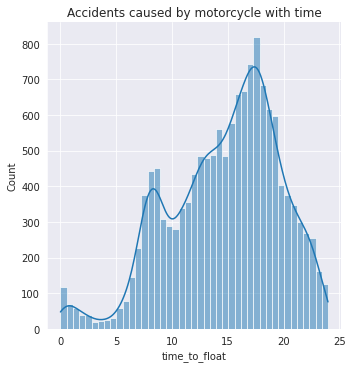

In [25]:
%matplotlib inline
sns.set_style('darkgrid')
sns.displot(data=vehicle_type_df_with_Accidents,x=vehicle_type_df_with_Accidents["time_to_float"],kde=True)
plt.title('Accidents caused by motorcycle with time')
plt.show()

In [26]:
when_was_it_motorcycle_df = vehicle_type_df_with_Accidents[['Time', 'Hour', 'Daytime']]
when_was_it_motorcycle_df.count()

Time       14317
Hour       14317
Daytime    14317
dtype: int64

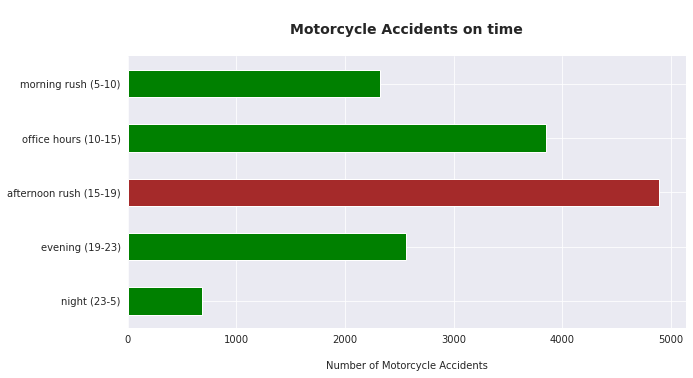

In [27]:
# hour check for motorcycle

category = ['night (23-5)', 'evening (19-23)', 'afternoon rush (15-19)', 'office hours (10-15)', 'morning rush (5-10)']
vehicle_type_df_with_Accidents_sub = vehicle_type_df_with_Accidents.groupby('Daytime').size().reindex(category)


fig, ax = plt.subplots(figsize=(10, 5))
colors = ['green', 'green', 'brown', 'green', 'green']


vehicle_type_df_with_Accidents_sub.plot(kind='barh', ax=ax, color=colors)
ax.set_title('\nMotorcycle Accidents on time\n', fontsize=14, fontweight='bold')
ax.set(xlabel='\nNumber of Motorcycle Accidents', ylabel='')


sns.despine(top=True, right=True, left=True, bottom=True)

##### Calculating the total number of motorcycle accidents per each day of the week

In [28]:
# total number
motorcycle_accidents_per_weekday = vehicle_type_df_with_Accidents.groupby('Day_of_Week').size().reset_index(name='Count')
motorcycle_accidents_per_weekday['Day_of_Week'] = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
motorcycle_accidents_per_weekday.set_index('Day_of_Week', inplace=True)
motorcycle_accidents_per_weekday

,Count
Day_of_Week,
Sunday,1846
Monday,1857
Tuesday,2036
Wednesday,2142
Thursday,2145
Friday,2358
Saturday,1933


##### Visualizing the average number of motorcycle accidents per each day of the week

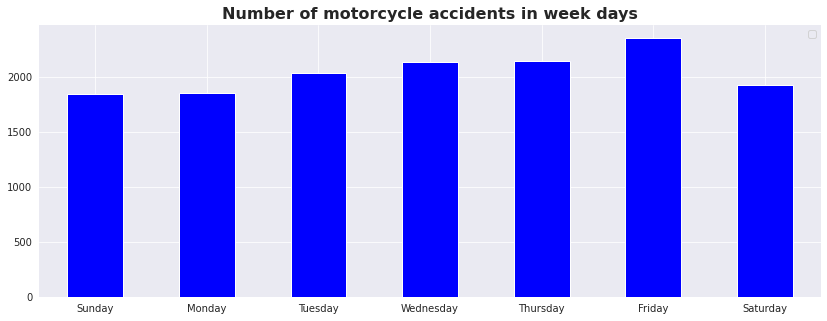

In [29]:
# visualizing
%matplotlib inline
motorcycle_accidents_per_weekday.plot(kind='bar', color='blue', figsize=(14,5))
plt.title('Number of motorcycle accidents in week days', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.xticks(rotation='horizontal')
plt.legend('')
sns.despine(top=True, bottom=False, left=True, right=True);

##### Calculating the average number of motorcycle accidents per each day of the week

In [30]:
#Average number of motorcycle accidents per week

# Get daily time series and convert to a dataframe
total_weekday_for_motorcycle = pd.DataFrame(vehicle_type_df_with_Accidents.set_index('Date').resample('1d').size().reset_index())
total_weekday_for_motorcycle.columns = ['Date', 'Count']
weekdays_motorcycle = total_weekday_for_motorcycle['Date'].dt.day_name()

In [31]:
# Group by weekdays and get daily average
weekday_avg_for_motorcycle = total_weekday_for_motorcycle.groupby(weekdays_motorcycle)['Count'].mean().reset_index()
weekday_avg_for_motorcycle.columns = ['Weekday', 'Avg_Accidents']
weekday_avg_for_motorcycle.set_index('Weekday', inplace=True)
weekday_avg_for_motorcycle

,Avg_Accidents
Weekday,
Friday,43.769231
Monday,35.711538
Saturday,38.730769
Sunday,38.346154
Thursday,40.807692
Tuesday,38.377358
Wednesday,38.846154


##### Visualizing the average number of motorcycle accidents per each day of the week

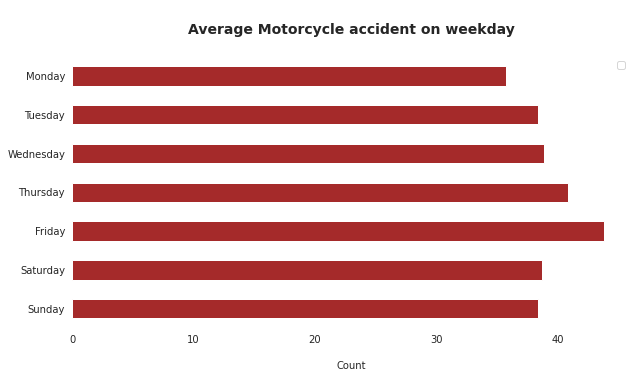

In [32]:
days = ['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday']


sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,5))


weekday_avg_for_motorcycle.reindex(days).plot(kind='barh', color='brown', ax=ax)
ax.set_title('\nAverage Motorcycle accident on weekday\n', fontsize=14, fontweight='bold')
ax.set(xlabel='\nCount', ylabel='')
ax.legend('')


sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

### Qc Finding the hours of the day and day of the week on which pedestrians are most likely to be involved in accidents.
##### let's look at what part of the day has the most accidents for pedestrians.

In [33]:
casualties_for_pedestrians=casualties_data[(casualties_data['Casualty_Type']==0)]
casualties_for_pedestrians.head(5)

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
5,2019010155192,1,1,3,1,68,10,2,5,4,0,0,0,0,1,4
11,2019010155196,1,1,3,1,40,7,3,1,3,0,0,0,0,1,4
19,2019010155209,1,1,3,1,23,5,3,1,1,0,0,0,0,1,8
20,2019010155210,1,1,3,1,24,5,1,5,1,0,0,0,0,1,10
21,2019010155216,1,1,3,1,38,7,3,5,3,0,0,0,0,1,4


In [34]:
casualties_DataFrame_accidents=accidents_data.merge(casualties_for_pedestrians, on=['Accident_Index'], how='inner')
casualties_DataFrame_accidents.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'time_conversion', 'time_to_float', 'Hour',
       'Daytime', 'Vehicle_Reference', 'Casualty_Reference', 'Casualty_Class',
       'Sex_of_Casualty', 'Age_of_Casualty', 'Age_Band_of_Casualty',
       'Casualt

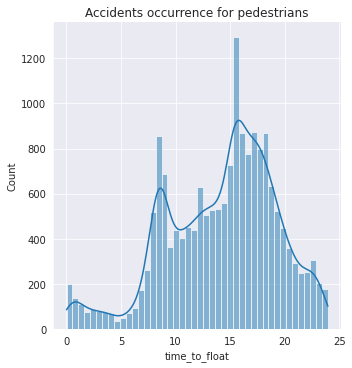

In [35]:
%matplotlib inline
sns.set_style('darkgrid')
sns.displot(data=casualties_DataFrame_accidents,x=casualties_DataFrame_accidents["time_to_float"],kde=True)
plt.title('Accidents occurrence for pedestrians')
plt.show()

##### let's take a deeper look at what part of the day has the most accidents for pedestrians.

In [36]:
when_was_it_pedestrian_df = casualties_DataFrame_accidents[['Time', 'Hour', 'Daytime']]
when_was_it_pedestrian_df.count()

Time       18074
Hour       18074
Daytime    18074
dtype: int64

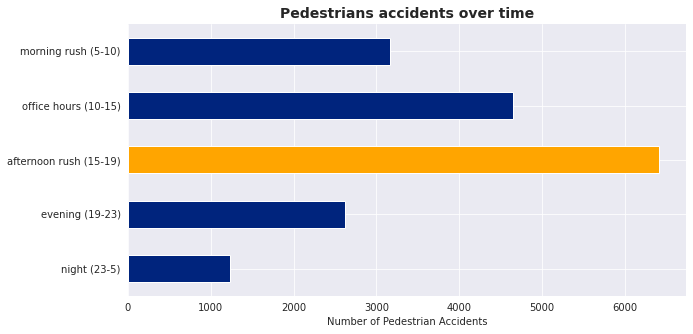

In [37]:
category = ['night (23-5)', 'evening (19-23)', 'afternoon rush (15-19)', 'office hours (10-15)', 'morning rush (5-10)']
casualties_DataFrame_accidents_sub = casualties_DataFrame_accidents.groupby('Daytime').size().reindex(category)


fig, ax = plt.subplots(figsize=(10, 5))
colors = [c_blue, c_blue, 'orange', c_blue, c_blue]


casualties_DataFrame_accidents_sub.plot(kind='barh', ax=ax, color=colors)
ax.set_title('Pedestrians accidents over time', fontsize=14, fontweight='bold')
ax.set(xlabel='Number of Pedestrian Accidents', ylabel='')


sns.despine(top=True, right=True, left=True, bottom=True)

##### Finding the weekday with highest pedestriance accident occurrence

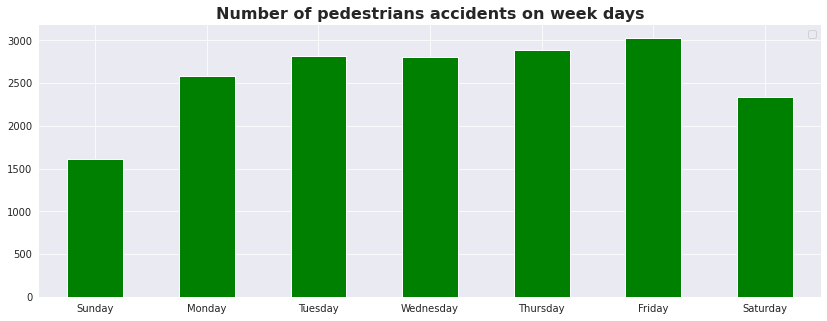

In [38]:
pedestrians_accidents_per_weekday = casualties_DataFrame_accidents.groupby('Day_of_Week').size().reset_index(name='Count')
pedestrians_accidents_per_weekday['Day_of_Week'] = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
pedestrians_accidents_per_weekday.set_index('Day_of_Week', inplace=True)
pedestrians_accidents_per_weekday
# visualizing
%matplotlib inline
pedestrians_accidents_per_weekday.plot(kind='bar', color='green', figsize=(14,5))
plt.title('Number of pedestrians accidents on week days', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.xticks(rotation='horizontal')
plt.legend('')
sns.despine(top=True, bottom=False, left=True, right=True);

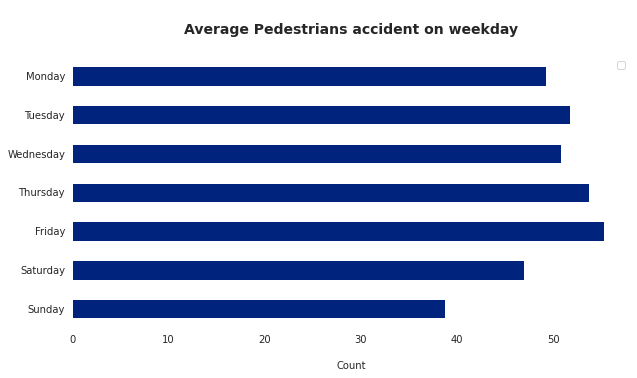

In [39]:
#Average number of pedestrian accidents per week

# Get daily time series and convert to a dataframe
total_weekday_for_pedestrians = pd.DataFrame(casualties_DataFrame_accidents.set_index('Date').resample('1d').size().reset_index())
total_weekday_for_pedestrians.columns = ['Date', 'Count']
weekdays_pedestrians = total_weekday_for_pedestrians['Date'].dt.day_name()
# Group by weekdays and get daily average
weekday_avg_for_pedestrians = total_weekday_for_pedestrians.groupby(weekdays_motorcycle)['Count'].mean().reset_index()
weekday_avg_for_pedestrians.columns = ['Weekday', 'Avg_Accidents']
weekday_avg_for_pedestrians.set_index('Weekday', inplace=True)

#plots
days = ['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday']


sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,5))


weekday_avg_for_pedestrians.reindex(days).plot(kind='barh', color=c_blue, ax=ax)
ax.set_title('\nAverage Pedestrians accident on weekday\n', fontsize=14, fontweight='bold')
ax.set(xlabel='\nCount', ylabel='')
ax.legend('')


sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

#### Qd: Calculating the effect of daylight saving on accident occurence.
##### For the year 2019, daylight saving began on Sunday, 31st March at 1:00am and ended on Sunday, 27th October at 2:00am. Information source: https://www.timeanddate.com/time/change/uk/london?year=2019

In other to calculate the effects of daylight savings, I will be examiing the results from two weeks before it starts and two weeks after it starts and then compare them. The following dates will be used:

*   March 17th, 2019 to march 30th, 2019 (Two weeks before it begins).
*   March 31st, 2019 to April 13th, 2019 (Two weeks after it begins).
*   October 13th, 2019 to October 26th, 2019 (Two weeks before it ends).
*   October 27th, 2019 to November 9th, 2019 (Two weeks after it ends).







In [40]:
Two_weeks_before_daylight_savings_starts = accidents_data[accidents_data['Date'].between('2019-03-17', '2019-03-30')]
Two_weeks_after_daylight_savings_starts = accidents_data[accidents_data['Date'].between('2019-03-31', '2019-04-13')]
Two_weeks_before_daylight_savings_ends = accidents_data[accidents_data['Date'].between('2019-10-13', '2019-10-26')]
Two_weeks_after_daylight_savings_ends = accidents_data[accidents_data['Date'].between('2019-10-27', '2019-11-09')]

##### I will calculate the percentage change in number of accidents before it starts and before it ends

In [41]:
number_of_accidents_before_DS_start = len(Two_weeks_before_daylight_savings_starts)
number_of_accidents_after_DS_starts = len(Two_weeks_after_daylight_savings_starts)
number_of_accidents_before_DS_stops = len(Two_weeks_before_daylight_savings_ends)
number_of_accidents_after_DS_stops = len(Two_weeks_after_daylight_savings_ends)

# Calculating the percentage change
percentage_change_start = (number_of_accidents_after_DS_starts - number_of_accidents_before_DS_start) / number_of_accidents_before_DS_start 
print('Precentage change after daylight savings started: {:.2f}'.format(percentage_change_start * 100) + '%')

percentage_change_end = (number_of_accidents_after_DS_stops - number_of_accidents_before_DS_stops) / number_of_accidents_before_DS_stops
print('Precentage change after daylight savings ended: {:.2f}'.format(percentage_change_end * 100) + '%')

Precentage change after daylight savings started: 5.24%
Precentage change after daylight savings ended: -3.67%


##### Visualizing the the effects of daylight savings 

In [42]:
data = {
    'periods': ['before_DS_starts', 'after_DS_starts', 'before_DS_stops', 'after_DS_stops'],
  "accidents_count": [number_of_accidents_before_DS_start, number_of_accidents_after_DS_starts, number_of_accidents_before_DS_stops, number_of_accidents_after_DS_stops ],
}
periods = ['before_DS_starts', 'after_DS_starts', 'before_DS_stops', 'after_DS_stops']
effects_of_daylight_savings_df = pd.DataFrame(data)
effects_of_daylight_savings_df.set_index('periods', inplace=True)
effects_of_daylight_savings_df

,accidents_count
periods,
before_DS_starts,4387
after_DS_starts,4617
before_DS_stops,4628
after_DS_stops,4458


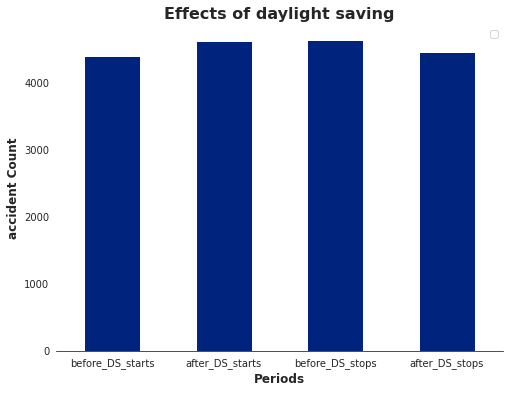

In [43]:
%matplotlib inline
effects_of_daylight_savings_df.plot(kind='bar', color=c_blue, figsize=(8,6))
plt.title('Effects of daylight saving', fontsize=16, fontweight='bold')
plt.xlabel('Periods', fontsize=12, fontweight='bold')
plt.ylabel('accident Count', fontsize=12, fontweight='bold')
plt.xticks(rotation='horizontal')
plt.legend('')
sns.despine(top=True, bottom=False, left=True, right=True)


#### Qe: Effects of Sunrise and Sunset times on traffic accidents
###### In this case, I will be examining the accident occurrence in two scenerios which are: during Shorter days and during longer days.
###### For Shorter days, its usually during winter with latest sunrise at 9:30am and earliest sunset at 3:30pm.

###### For Longer days: This is usually during summer with earliest sunrise at 5:00am and latest sunset at 9:00pm

###### source for sunrise and sunset times: https://suncurves.com/en/v/13452/

###### Effects of sunrise and sunset times

In [44]:
shorterday = accidents_data[accidents_data['Time'].between('09:30','15:30')]
longerday = accidents_data[accidents_data['Time'].between('05:00', '21:00')]


number_of_accidents_on_shorter_days = len(shorterday)
number_of_accidents_on_longer_days = len(longerday)
print('accidents on shorter days:', number_of_accidents_on_shorter_days)
print('accidents on longer days:', number_of_accidents_on_longer_days)

accidents on shorter days: 39819
accidents on longer days: 102648


In [45]:
sunrise_sunset_data = {
    'periods': ['shorter days', 'longer days'],
  "accidents occurence": [number_of_accidents_on_shorter_days, number_of_accidents_on_longer_days],
}

effects_of_sunrise_sunset_df = pd.DataFrame(sunrise_sunset_data)
effects_of_sunrise_sunset_df.set_index('periods', inplace=True)
effects_of_sunrise_sunset_df

,accidents occurence
periods,
shorter days,39819
longer days,102648


##### Visualization

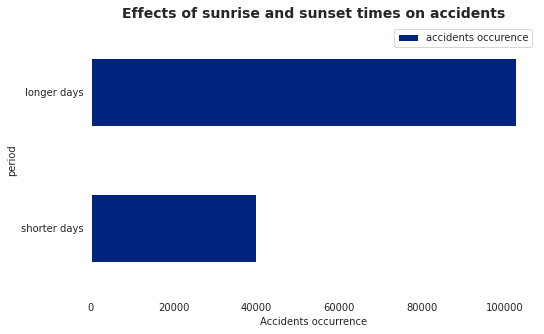

In [46]:
fig, ax = plt.subplots(figsize=(8, 5))


effects_of_sunrise_sunset_df.plot(kind='barh', ax=ax, color=c_blue)
ax.set_title('Effects of sunrise and sunset times on accidents', fontsize=14, fontweight='bold')
ax.set(xlabel='Accidents occurrence', ylabel='period')


sns.despine(top=True, right=True, left=True, bottom=True)

###### Qf: Checking the vehicle types that is mostly involved in accidents. In these case, I will be examining the average number of accidents caused by each of the vehicle types by considering their properties such as age of vehicle and engine capacity.

##### Vehicle categories in terms of engine capacity

In [47]:
# engine capacity categories
engine_capacity = {
    1:'Less than 1000 CC',
    2:'1000 CC to 2000 CC',
    3:'2000 CC to 3000 CC',
    4:'3000 CC to 5000 CC',
    5:'5000 CC to 10000 CC',
    6:'10000 CC+',
    -1:'Missing data'
    }

In [48]:
def engine_capacity_categories(engine_capacity):
    if engine_capacity > 0 and engine_capacity <= 1000:
        return '1'
    elif engine_capacity > 1000 and engine_capacity <= 2000:
        return '2'
    elif engine_capacity > 2000 and engine_capacity <= 3000:
        return '3'
    elif engine_capacity > 3000 and engine_capacity <= 5000:
        return '4'
    elif engine_capacity > 5000 and engine_capacity <= 10000:
        return '5'
    elif engine_capacity > 10000:
        return '6'
    else:
        return '-1'
    
vehicles_data['Engine_CC_grouped'] = vehicles_data['Engine_Capacity_(CC)'].apply(engine_capacity_categories).astype('int')
vehicles_data['Engine_CC_grouped'].unique()

array([-1,  2,  1,  3,  4,  5,  6])

##### Visualizing vehicle categories in terms of engine capacity

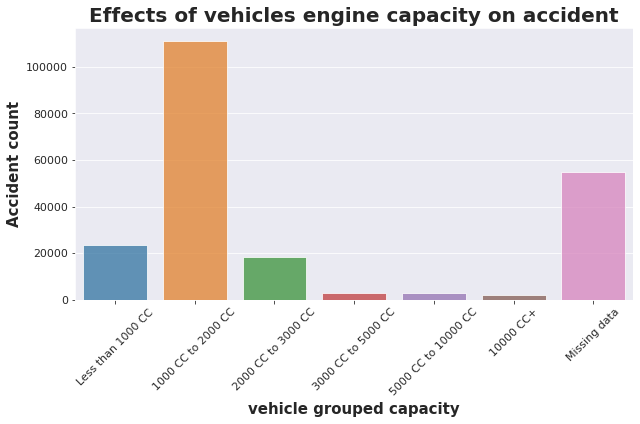

In [49]:
# Engine_capacity_of_vehicles
sns.set_style('darkgrid')
engine_category_code = [1,2,3,4,5,6,-1]

plt.figure(figsize=(10,5))
engine_cat = sns.countplot(x =vehicles_data['Engine_CC_grouped'], 
                                        data=vehicles_data, 
                                        order = engine_category_code,
                                        alpha=0.75,
                                        linewidth=1)


engine_cat.set_xticklabels(['Less than 1000 CC',
                         '1000 CC to 2000 CC',
                         '2000 CC to 3000 CC',
                         '3000 CC to 5000 CC',
                         '5000 CC to 10000 CC',
                         '10000 CC+',
                         'Missing data'], rotation=45)
plt.tick_params(bottom=True, left=True)
plt.yticks(fontsize = 11)
plt.xticks(fontsize = 11)
plt.title('Effects of vehicles engine capacity on accident', fontsize=20,fontweight='bold')
plt.xlabel('vehicle grouped capacity', fontsize = 15, fontweight='bold')
plt.ylabel('Accident count', fontsize = 15, fontweight='bold')
sns.despine(top=False, right=True, left=False, bottom=False)
plt.show()

###### Vehicle category in terms of age of vehicle

In [50]:
# Age of vehicle category

age_of_vehicle_category = {
    1:'Less than 5',
    2:'5 to 10',
    3:'10 to 15',
    4:'15 to 20',
    5:'20 to 25',
    6:'25 to 30',
    7:'30+',
    -1:'missing'
    }

In [51]:
def vehicle_age_categories(age_of_vehicle_category):
    if age_of_vehicle_category > 0 and age_of_vehicle_category <= 5:
      return '1'
    elif age_of_vehicle_category >= 5 and age_of_vehicle_category <= 10:
      return '2'
    elif age_of_vehicle_category >= 10 and age_of_vehicle_category <= 15:
      return '3'
    elif age_of_vehicle_category >= 15 and age_of_vehicle_category <= 20:
      return '4'
    elif age_of_vehicle_category >= 20 and age_of_vehicle_category <= 25:
      return '5'
    elif age_of_vehicle_category >= 25 and age_of_vehicle_category <= 30:
      return '6'
    elif age_of_vehicle_category >= 30:
      return '7'
    else:
      return '-1'
    
vehicles_data['vehicles_age_grouped'] = vehicles_data['Age_of_Vehicle'].apply(vehicle_age_categories).astype('int')
vehicles_data['vehicles_age_grouped'].unique()

array([-1,  1,  3,  2,  4,  5,  6,  7])

##### Visualizing Vehicle category in terms of age of vehicle

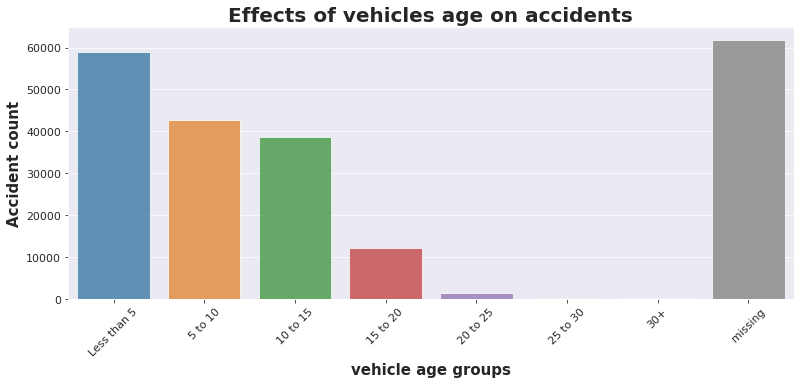

In [52]:

sns.set_style('darkgrid')
vehicle_age_category_code = [1,2,3,4,5,6,7,-1]

plt.figure(figsize=(13,5))
vehicle_age_cat = sns.countplot(x =vehicles_data['vehicles_age_grouped'], 
                                        data=vehicles_data, 
                                        order = vehicle_age_category_code,
                                        alpha=0.75,
                                        linewidth=1)


vehicle_age_cat.set_xticklabels(['Less than 5',
    '5 to 10',
    '10 to 15',
    '15 to 20',
    '20 to 25',
    '25 to 30',
    '30+',
    'missing'], rotation=45)
plt.tick_params(bottom=True, left=True)
plt.yticks(fontsize = 11)
plt.xticks(fontsize = 11)
plt.title('Effects of vehicles age on accidents', fontsize=20,fontweight='bold')
plt.xlabel('vehicle age groups', fontsize = 15, fontweight='bold')
plt.ylabel('Accident count', fontsize = 15, fontweight='bold')
sns.despine(top=False, right=True, left=False, bottom=False)
plt.show()

##### QG: Particular conitions such as weather, geographic location and situations. In this case, I will be examining the number of accidents and its severity caused by road surface condition, weather conditions, light conditions, road type, speed limits and geographical locations

##### For light conditions

In [53]:
light_conditions_accidents_sub = accidents_data.groupby('Light_Conditions').size().reset_index()
light_conditions_accidents_sub

,Light_Conditions,0
0,-1,1
1,1,83511
2,4,24407
3,5,891
4,6,6092
5,7,2634


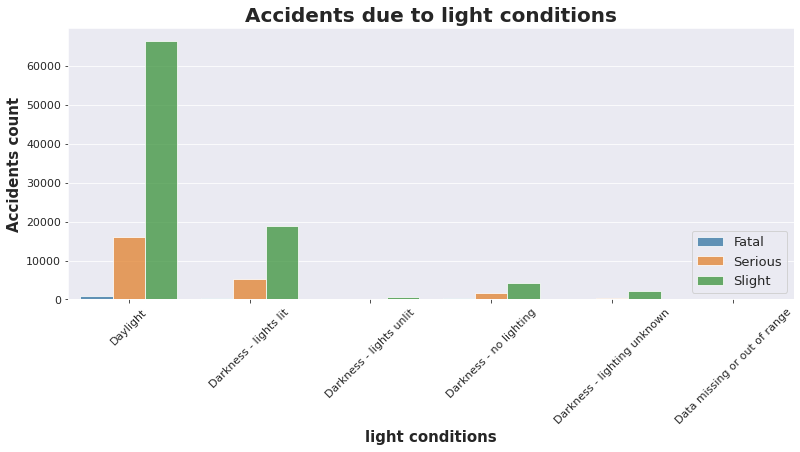

In [54]:
#Light conditions
sns.set_style('darkgrid')
light_cat_code = [1,4,5,6,7,-1]
severity_hue_order = [1,2,3]
plt.figure(figsize=(13,5))
light_category = sns.countplot(x =accidents_data['Light_Conditions'], 
                                        data=accidents_data, 
                                        order = light_cat_code,
                                        alpha=0.75,
                         hue = accidents_data['Accident_Severity'],
                                        hue_order = severity_hue_order,
                                        linewidth=1)


light_category.set_xticklabels(['Daylight',
 'Darkness - lights lit', 
 'Darkness - lights unlit', 
 'Darkness - no lighting',
 'Darkness - lighting unknown',
 'Data missing or out of range'], rotation=45)


plt.tick_params(bottom=True, left=True)
plt.yticks(fontsize = 11)
plt.xticks(fontsize = 11)
plt.title('Accidents due to light conditions', fontsize=20,fontweight='bold')
plt.xlabel('light conditions', fontsize = 15, fontweight='bold')
plt.ylabel('Accidents count', fontsize = 15, fontweight='bold')
plt.legend(['Fatal', 'Serious','Slight'],prop={'size': 13}, loc=4)
sns.despine(top=False, right=True, left=False, bottom=False)
plt.show()

##### For road surface conditions

In [55]:
road_surface_accidents_sub = accidents_data.groupby('Road_Surface_Conditions').size().reset_index()
road_surface_accidents_sub

,Road_Surface_Conditions,0
0,-1,1349
1,1,82321
2,2,32259
3,3,245
4,4,1185
5,5,177


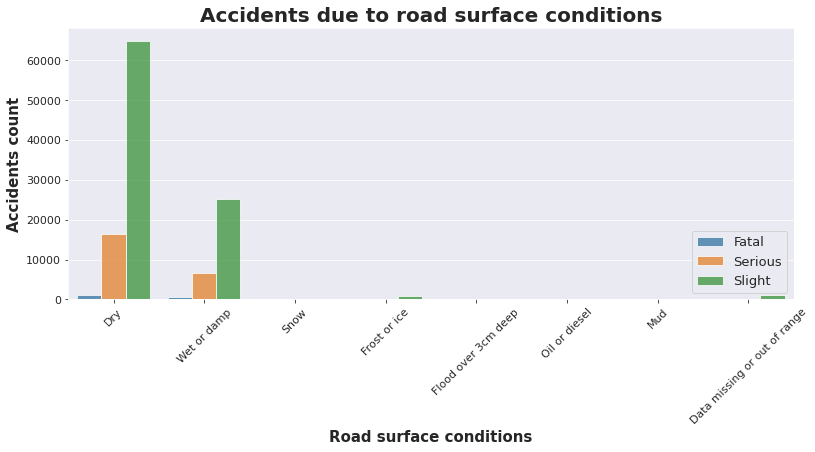

In [56]:
# Road surface conditions
sns.set_style('darkgrid')
road_cat_code = [1,2,3,4,5,6,7,-1]
severity_hue_order = [1,2,3]
plt.figure(figsize=(13,5))
road_category = sns.countplot(x =accidents_data['Road_Surface_Conditions'], 
                                        data=accidents_data, 
                                        order = road_cat_code,
                                        alpha=0.75,
                         hue = accidents_data['Accident_Severity'],
                                        hue_order = severity_hue_order,
                                        linewidth=1)


road_category.set_xticklabels(['Dry', 
                               'Wet or damp', 
                               'Snow', 
                               'Frost or ice',
                               'Flood over 3cm deep',
                               'Oil or diesel',
                               'Mud',
                               'Data missing or out of range'], rotation=45)


plt.tick_params(bottom=True, left=True)
plt.yticks(fontsize = 11)
plt.xticks(fontsize = 11)
plt.title('Accidents due to road surface conditions', fontsize=20,fontweight='bold')
plt.xlabel('Road surface conditions', fontsize = 15, fontweight='bold')
plt.ylabel('Accidents count', fontsize = 15, fontweight='bold')
plt.legend(['Fatal', 'Serious','Slight'],prop={'size': 13}, loc=4)
sns.despine(top=False, right=True, left=False, bottom=False)
plt.show()

##### For weather conditions

In [57]:
weather_conditions_accidents_sub = accidents_data.groupby('Weather_Conditions').size().reset_index()
weather_conditions_accidents_sub

,Weather_Conditions,0
0,1,92316
1,2,15294
2,3,353
3,4,1230
4,5,1430
5,6,40
6,7,394
7,8,3043
8,9,3436


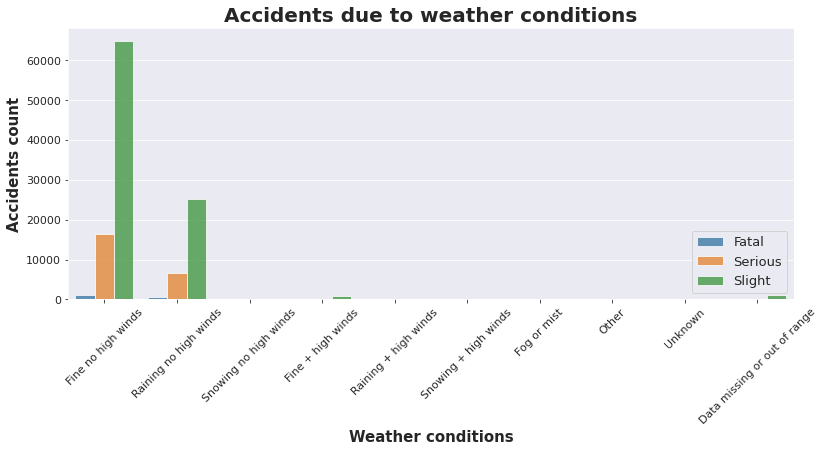

In [58]:
# Weather conditions
sns.set_style('darkgrid')
weather_cat_code = [1,2,3,4,5,6,7,8,9,-1]
severity_hue_order = [1,2,3]
plt.figure(figsize=(13,5))
weather_category = sns.countplot(x =accidents_data['Road_Surface_Conditions'], 
                                        data=accidents_data, 
                                        order = weather_cat_code,
                                        alpha=0.75,
                         hue = accidents_data['Accident_Severity'],
                                        hue_order = severity_hue_order,
                                        linewidth=1)


weather_category.set_xticklabels(['Fine no high winds', 
                               'Raining no high winds', 
                               'Snowing no high winds', 
                               'Fine + high winds',
                               'Raining + high winds',
                               'Snowing + high winds',
                               'Fog or mist',
                               'Other',
                               'Unknown',
                               'Data missing or out of range'], rotation=45)


plt.tick_params(bottom=True, left=True)
plt.yticks(fontsize = 11)
plt.xticks(fontsize = 11)
plt.title('Accidents due to weather conditions', fontsize=20,fontweight='bold')
plt.xlabel('Weather conditions', fontsize = 15, fontweight='bold')
plt.ylabel('Accidents count', fontsize = 15, fontweight='bold')
plt.legend(['Fatal', 'Serious','Slight'],prop={'size': 13}, loc=4)
sns.despine(top=False, right=True, left=False, bottom=False)
plt.show()

##### Accidents due to road type

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


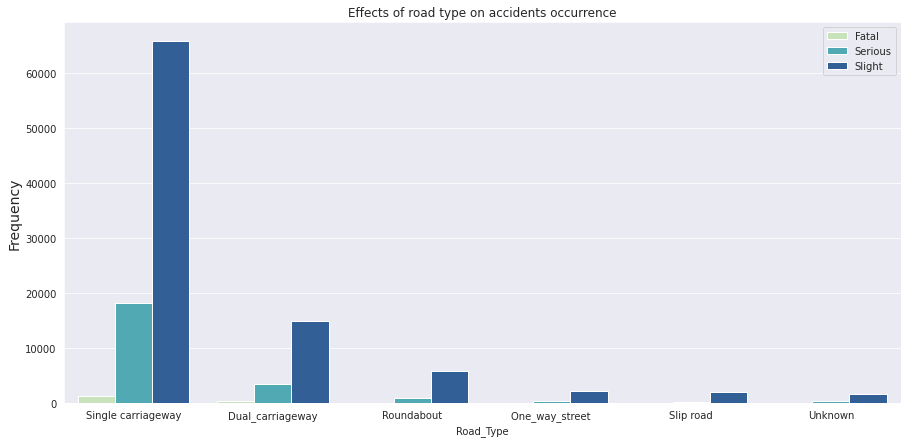

In [59]:
# Road type
plt.figure(figsize=(15,7))
ax = sns.countplot('Road_Type',hue='Accident_Severity',data=accidents_data, 
                   order = accidents_data["Road_Type"].value_counts().index, palette = "YlGnBu")
ax.set_xticklabels(['Single carriageway','Dual_carriageway','Roundabout',
                    'One_way_street ',
                    'Slip road','Unknown'])
plt.legend(['Fatal','Serious','Slight'])
plt.title('Effects of road type on accidents occurrence')
plt.ylabel("Frequency", fontsize = 14)
plt.show()

##### For Geographic location

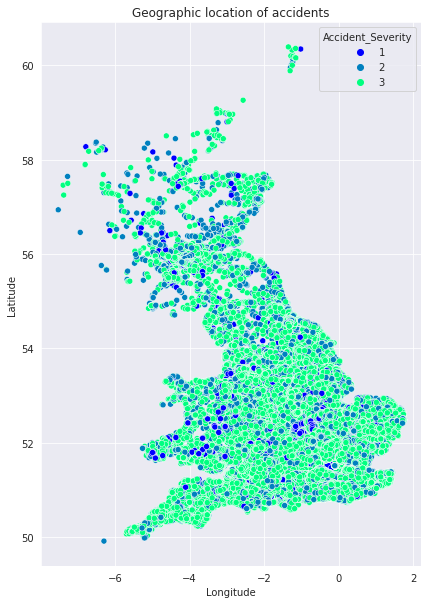

In [60]:

plt.figure(figsize=(15,10))
plt.subplot(1,2,2)
sns.scatterplot(data=accidents_data, x = "Longitude", y = "Latitude", hue = "Accident_Severity", palette = "winter")
plt.title('Geographic location of accidents')
plt.show()

##### For speed limits

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


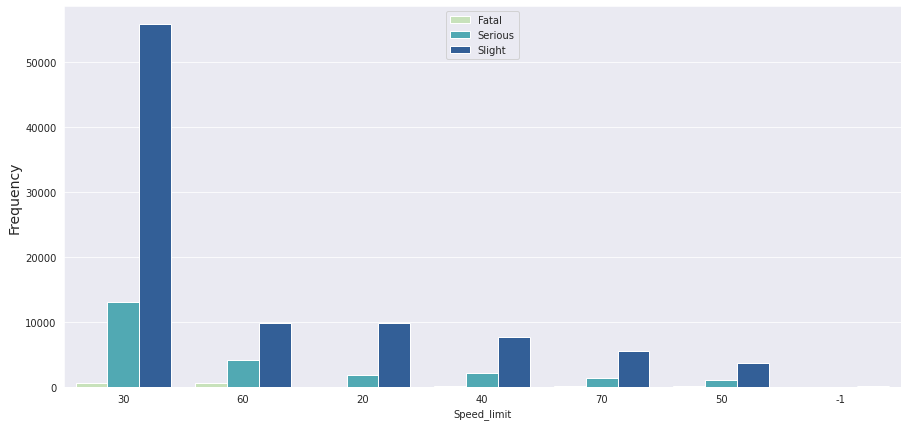

In [61]:
plt.figure(figsize=(15,7))
ax = sns.countplot('Speed_limit',hue='Accident_Severity',data=accidents_data, 
                   order = accidents_data["Speed_limit"].value_counts().index, palette = "YlGnBu")
plt.legend(['Fatal','Serious','Slight'])
plt.ylabel("Frequency", fontsize = 14)
plt.show()

##### Qh: How driver related variables affects accidents. In this case, I will be examining the effects of driver's age and journey purpose of driver on the number of accidence occurrence

In [62]:
vehicles_data['Journey_Purpose_of_Driver'].unique()

array([ 6,  1,  2,  3,  4, -1,  5])

##### Effects of age of drivers

In [63]:
# Grouping drivers 

vehicles_plus_accidents_data = accidents_data.merge(vehicles_data, on=['Accident_Index'], how='inner') #merging vehicles data and accidents data

# Removing drivers age from 0 to 10 and converting their age group to out of range
age_of_drivers_group = {
    1:'11-15',
    2:'16-20',
    3:'21-25',
    4:'26-35',
    5:'36-45',
    6:'46-55',
    7:'56-65',
    8:'66-75',
    9:'76+',
    -1:'missing or out of range'
    }

In [64]:
def drivers_age_categories(age_of_driver):
  if age_of_driver >= 11 and age_of_driver <= 15:
    return '1'
  elif age_of_driver >= 16 and age_of_driver <= 20:
    return '2'
  elif age_of_driver >= 21 and age_of_driver <= 25:
    return '3'
  elif age_of_driver >= 26 and age_of_driver <= 35:
    return '4'
  elif age_of_driver >= 36 and age_of_driver <= 45:
    return '5'
  elif age_of_driver >= 46 and age_of_driver <= 55:
    return '6'
  elif age_of_driver >= 56 and age_of_driver <= 65:
    return '7'
  elif age_of_driver >= 66 and age_of_driver <= 75:
    return '8'
  elif age_of_driver >= 76:
    return '9'
  else:
    return '-1'
    
vehicles_plus_accidents_data['drivers_age_grouped'] = vehicles_plus_accidents_data['Age_of_Driver'].apply(drivers_age_categories).astype('int')
vehicles_plus_accidents_data['drivers_age_grouped'].unique()

array([ 7, -1,  3,  5,  4,  6,  2,  9,  1,  8])

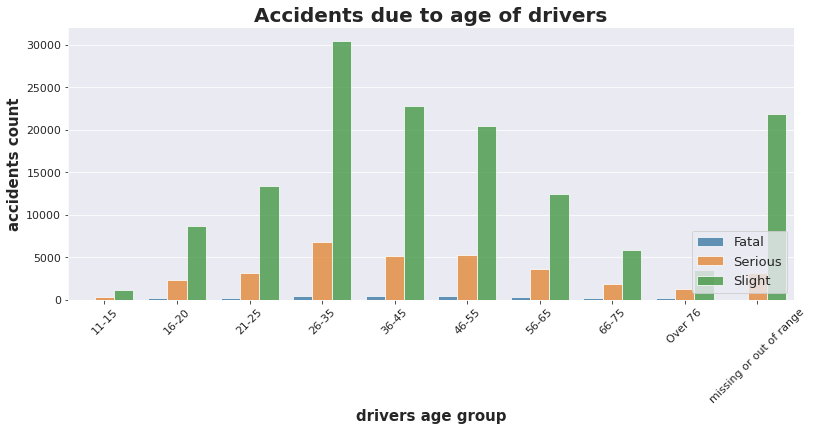

In [65]:
sns.set_style('darkgrid')
age_of_drivers_cat_code = [1,2,3,4,5,6,7,8,9,-1]
severity_hue_order = [1,2,3]
plt.figure(figsize=(13,5))
vehicles_accident_category = sns.countplot(x = vehicles_plus_accidents_data['drivers_age_grouped'], 
                                        data = vehicles_plus_accidents_data, 
                                        order = age_of_drivers_cat_code,
                                        alpha=0.75,
                         hue = vehicles_plus_accidents_data['Accident_Severity'],
                                        hue_order = severity_hue_order,
                                        linewidth=1)


vehicles_accident_category.set_xticklabels(['11-15','16-20','21-25','26-35','36-45','46-55','56-65','66-75','Over 76', 'missing or out of range'], rotation=45)


plt.tick_params(bottom=True, left=True)
plt.yticks(fontsize = 11)
plt.xticks(fontsize = 11)
plt.title('Accidents due to age of drivers', fontsize=20,fontweight='bold')
plt.xlabel('drivers age group', fontsize = 15, fontweight='bold')
plt.ylabel('accidents count', fontsize = 15, fontweight='bold')
plt.legend(['Fatal', 'Serious','Slight'],prop={'size': 13}, loc=4)

sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

##### Effects of driver's purpose of the journey on accident occurrence

In [66]:
drivers_purpose_accidents_sub = vehicles_plus_accidents_data.groupby('Journey_Purpose_of_Driver').size().reset_index()
drivers_purpose_accidents_sub

,Journey_Purpose_of_Driver,0
0,-1,45
1,1,24829
2,2,19530
3,3,1831
4,4,617
5,5,20708
6,6,108105


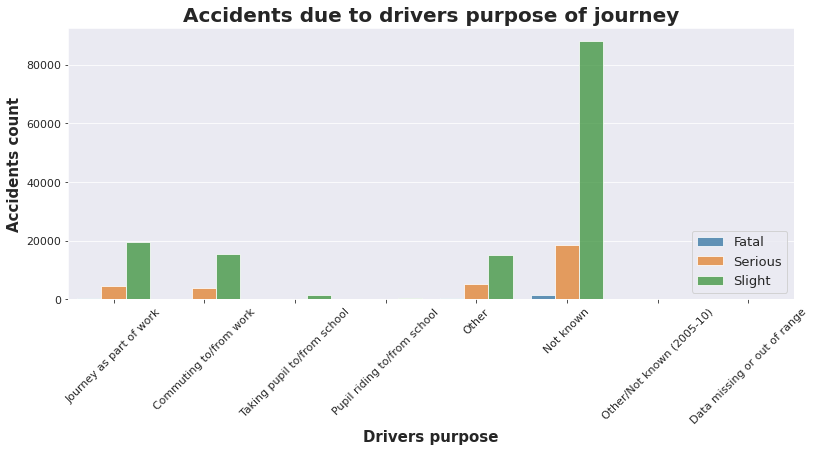

In [67]:
# For drivers journey pupose
sns.set_style('darkgrid')
drivers_purpose_cat_code = [1,2,3,4,5,6,15,-1]
severity_hue_order = [1,2,3]
plt.figure(figsize=(13,5))
drivers_purpose_category = sns.countplot(x =vehicles_plus_accidents_data['Journey_Purpose_of_Driver'], 
                                        data=vehicles_plus_accidents_data, 
                                        order = drivers_purpose_cat_code,
                                        alpha=0.75,
                         hue = vehicles_plus_accidents_data['Accident_Severity'],
                                        hue_order = severity_hue_order,
                                        linewidth=1)


drivers_purpose_category.set_xticklabels(['Journey as part of work', 
                               'Commuting to/from work', 
                               'Taking pupil to/from school', 
                               'Pupil riding to/from school',
                               'Other',
                               'Not known',
                               'Other/Not known (2005-10)',
                               'Data missing or out of range'], rotation=45)


plt.tick_params(bottom=True, left=True)
plt.yticks(fontsize = 11)
plt.xticks(fontsize = 11)
plt.title('Accidents due to drivers purpose of journey', fontsize=20,fontweight='bold')
plt.xlabel('Drivers purpose', fontsize = 15, fontweight='bold')
plt.ylabel('Accidents count', fontsize = 15, fontweight='bold')
plt.legend(['Fatal', 'Serious','Slight'],prop={'size': 13}, loc=4)
sns.despine(top=False, right=True, left=False, bottom=False)
plt.show()

####  Qi: Predictive model
##### This model will predict where, when and under what condition an accident occur. And the output of the prediction will be compared to the government model

###### In this section, I will need to get rid of all negative values in the datasets.

In [68]:
import functools as ft
# for all features, (-1) represent a missing data point, to better handle it with pandas, it will be replaced with NaN: 
accidents_data.replace(-1, np.nan, inplace=True)
casualties_data.replace(-1, np.nan, inplace=True)
vehicles_data.replace(-1, np.nan, inplace=True)

# Joining the three dataframes to have access to all features
dfs = [accidents_data, casualties_data, vehicles_data]

accidents_vehicles_casualities = ft.reduce(lambda left, right: pd.merge(left, right, on='Accident_Index', how='outer'), dfs)

accidents_vehicles_casualities.info()

# using junction informaton and geography location for model

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318758 entries, 0 to 318757
Data columns (total 75 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Accident_Index                               318758 non-null  object        
 1   Location_Easting_OSGR                        258188 non-null  float64       
 2   Location_Northing_OSGR                       258188 non-null  float64       
 3   Longitude                                    258188 non-null  float64       
 4   Latitude                                     258188 non-null  float64       
 5   Police_Force                                 258188 non-null  float64       
 6   Accident_Severity                            258188 non-null  float64       
 7   Number_of_Vehicles                           258188 non-null  float64       
 8   Number_of_Casualties                         258188 non-null  fl

### Building a predictive model

###### Feature selection

In [69]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression, f_classif

# specifying some targets
predictors = ['Weather_Conditions', 
              'Speed_limit', 
              'Light_Conditions',
              'Junction_Detail',
              'Road_Type'
              ]
#target = ['Accident_Severity']
# Then, drop null values
accidents_vehicles_casualities_cleaned = accidents_vehicles_casualities.dropna()

accidents_vehicles_casualities_cleaned.reset_index(drop=True)

accidents_vehicles_casualities_cleaned = accidents_vehicles_casualities_cleaned.filter(['Weather_Conditions', 'Speed_limit', 'Light_Conditions','Junction_Detail','Road_Type','Accident_Severity'], axis=1)

accidents_vehicles_casualities_cleaned_df = accidents_vehicles_casualities_cleaned[
                                                                                  (accidents_vehicles_casualities_cleaned['Weather_Conditions'] > 0) & 
                                                                                   (accidents_vehicles_casualities_cleaned['Speed_limit'] > 0) &  
                                                                                   (accidents_vehicles_casualities_cleaned['Light_Conditions'] > 0) &
                                                                                   (accidents_vehicles_casualities_cleaned['Junction_Detail'] > 0) &
                                                                                   (accidents_vehicles_casualities_cleaned['Road_Type'] > 0)
                                                                                   ]
accidents_vehicles_casualities_cleaned_df

,Weather_Conditions,Speed_limit,Light_Conditions,Junction_Detail,Road_Type,Accident_Severity
274,1.0,20.0,4.0,9.0,6.0,3.0
277,1.0,20.0,4.0,9.0,6.0,3.0
280,1.0,20.0,4.0,9.0,6.0,3.0
538,1.0,30.0,1.0,9.0,6.0,1.0
593,1.0,20.0,4.0,5.0,6.0,3.0
...,...,...,...,...,...,...
258166,1.0,60.0,1.0,3.0,6.0,1.0
258167,1.0,60.0,1.0,3.0,6.0,1.0
258184,1.0,60.0,1.0,3.0,6.0,3.0
258185,1.0,60.0,1.0,3.0,6.0,3.0


##### Performing feature selection

In [70]:
selector = SelectKBest(f_classif, k="all")
selector.fit(accidents_vehicles_casualities_cleaned_df[predictors], accidents_vehicles_casualities_cleaned_df["Accident_Severity"])


SelectKBest(k='all')

##### Getting p-values for each feature and transforming the p-values into some scores

In [71]:
scores = -np.log10(selector.pvalues_)

##### plotting the scores

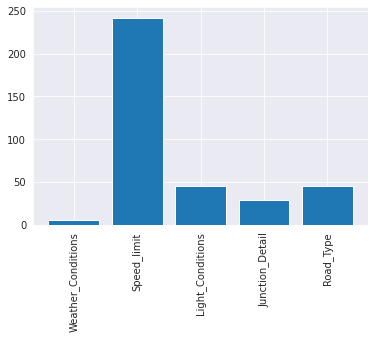

In [72]:
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

###### Building model for predicting where the accident occur, when it occured and severity of the injury sustained

###### Model for predicting accident severity

In [73]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot

###### More than one model is used in other to know the one that performs best. Models used are 

*   Decision tree classifier
*   Naive Bayes classifier
*   KNN
*   Logistics regression

In [74]:
# function for defining the models
def choose_models():
  models = dict()
  models['dtree'] = DecisionTreeClassifier()
  models['knn'] = KNeighborsClassifier()
  models['lr'] = LogisticRegression()
  models['bayes'] = GaussianNB()
  return models

In [75]:
from sklearn.model_selection import train_test_split

y_target = accidents_vehicles_casualities_cleaned_df["Accident_Severity"].values
Xfeatures =accidents_vehicles_casualities_cleaned_df.drop("Accident_Severity", axis=1)

In [76]:
def get_dataset(Xfeat, ytarget):
  X_train, X_validation, y_train, y_validation = train_test_split(Xfeat,ytarget,test_size=.25,random_state=1)
  return X_train, y_train

In [77]:
def evaluate_model(model, X, y):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  return scores

#Grab hold of the dataset.
X, y = get_dataset(Xfeatures, y_target)

#Getting the model to use.
models = choose_models()

results, names = list(), list()


##### Evaluate models

In [78]:
for name, model in models.items():
  scores = evaluate_model(model, X, y)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>dtree 0.791 (0.002)
>knn 0.773 (0.009)
>lr 0.792 (0.000)
>bayes 0.787 (0.002)


##### Stacking models
To see if the stacking accuracy will perform better

In [79]:
from sklearn.ensemble import StackingClassifier


def get_stacking():
  level0 = list()
  level0.append(('dtree', DecisionTreeClassifier()))
  level0.append(('knn', KNeighborsClassifier()))
  level0.append(('lr', LogisticRegression()))
  level0.append(('bayes', GaussianNB()))
  level1 = LogisticRegression()
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
  return model

models_stack = get_stacking()
scores = evaluate_model(models_stack, X, y)
print('>%s %.3f (%.3f)' % ('stacked',mean(scores), std(scores)))
# Sta


>stacked 0.793 (0.001)


#### Confusion matrix

###### Using decision tree classifier to predict accident severity

In [80]:
from sklearn.metrics import accuracy_score,precision_score,recall_score, confusion_matrix
 
X_train, X_validation, y_train, y_validation = train_test_split(Xfeatures,y_target,test_size=.25,random_state=1)

# create confusion matrix
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_test_preds_dtree = dtree.predict(X_validation)
matrix = confusion_matrix(y_validation, y_test_preds_dtree)



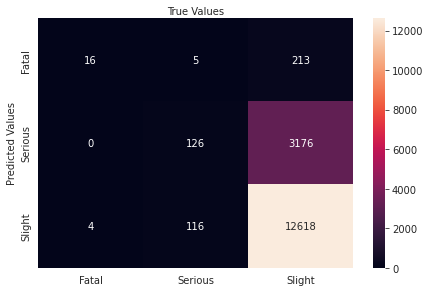

In [81]:
# create dataframe
class_names = accidents_vehicles_casualities_cleaned_df['Accident_Severity'].values
dataframe = pd.DataFrame(matrix, index=['Fatal', 'Serious', 'Slight'], 
                         columns=['Fatal', 'Serious', 'Slight'])


fig,ax = plt.subplots()


sns.heatmap(dataframe, annot=True, fmt="d")
ax.xaxis.set_label_position('top')
plt.tight_layout(), plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.show()

##### Model for predicting the condition in which accident occurred
*This time, the target will be light condition*

In [82]:
from sklearn.model_selection import train_test_split

y_target2 = accidents_vehicles_casualities_cleaned_df["Light_Conditions"].values
Xfeatures2 =accidents_vehicles_casualities_cleaned_df.drop("Light_Conditions", axis=1)

In [83]:
#Grab hold of the dataset.
X1, y1 = get_dataset(Xfeatures2, y_target2)

#Getting the model to use.
models1 = choose_models()

results1, names1 = list(), list()

###### More than one model is used in other to know the one that performs best. Models used are 

*   Decision tree classifier
*   Naive Bayes classifier
*   KNN
*   Logistics regression






In [84]:
for name, model in models1.items():
  scores = evaluate_model(model, X1, y1)
  results1.append(scores)
  names1.append(name)
  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>dtree 0.742 (0.003)
>knn 0.713 (0.012)
>lr 0.734 (0.002)
>bayes 0.711 (0.003)


###### Confusion matrix

##### using decision tree classifier to predict since it has the highest accuracy

In [85]:
from sklearn.metrics import accuracy_score,precision_score,recall_score, confusion_matrix

X_train2, X_validation2, y_train2, y_validation2 = train_test_split(Xfeatures2,y_target2,test_size=.25,random_state=1)

# create confusion matrix
dtree2 = DecisionTreeClassifier()
dtree2.fit(X_train2,y_train2)
y_test_preds_dtree2 = dtree2.predict(X_validation2)
matrix2 = confusion_matrix(y_validation2, y_test_preds_dtree2)

<Figure size 1800x1800 with 0 Axes>

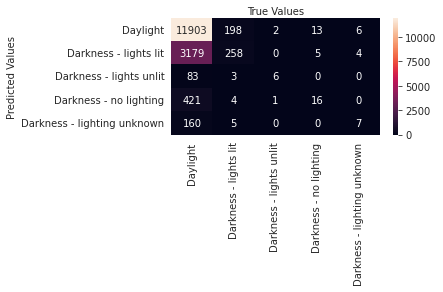

In [86]:
# create dataframe
class_names = accidents_vehicles_casualities_cleaned_df['Light_Conditions'].values
dataframe = pd.DataFrame(matrix2, index=['Daylight','Darkness - lights lit', 'Darkness - lights unlit', 'Darkness - no lighting','Darkness - lighting unknown'], 
                         columns=['Daylight','Darkness - lights lit', 'Darkness - lights unlit', 'Darkness - no lighting','Darkness - lighting unknown'])

plt.figure(figsize=(25,25))
fig,ax = plt.subplots()


sns.heatmap(dataframe, annot=True, fmt="d")
ax.xaxis.set_label_position('top')
plt.tight_layout(), plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.show()

##### Model for predicting where the accident occurred

###### In this case, the junction details will be the target

In [87]:
from sklearn.model_selection import train_test_split

y_target3 = accidents_vehicles_casualities_cleaned_df['Junction_Detail'].values
Xfeatures3 =accidents_vehicles_casualities_cleaned_df.drop('Junction_Detail', axis=1)

In [88]:
#Grab hold of the dataset.
X2, y2 = get_dataset(Xfeatures3, y_target3)

#Getting the model to use.
models2 = choose_models()

results2, names2 = list(), list()

###### More than one model is used in other to know the one that performs best. Models used are 

*   Decision tree classifier
*   Naive Bayes classifier
*   KNN
*   Logistics regression

In [89]:
for name, model in models2.items():
  scores = evaluate_model(model, X2, y2)
  results2.append(scores)
  names2.append(name)
  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>dtree 0.582 (0.004)
>knn 0.550 (0.010)
>lr 0.552 (0.003)
>bayes 0.541 (0.005)


##### Plotting confusion matrix

##### Using the decison tree classifier since it has the highest accuracy

In [90]:
from sklearn.metrics import accuracy_score,precision_score,recall_score, confusion_matrix

X_train3, X_validation3, y_train3, y_validation3 = train_test_split(Xfeatures3,y_target3,test_size=.25,random_state=1)

# create confusion matrix
dtree3 = DecisionTreeClassifier()
dtree3.fit(X_train3,y_train3)
y_test_preds_dtree3 = dtree3.predict(X_validation3)
matrix3 = confusion_matrix(y_validation3, y_test_preds_dtree3)

<Figure size 2880x2880 with 0 Axes>

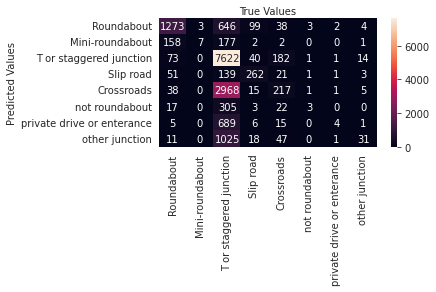

In [91]:
# create dataframe
class_names = accidents_vehicles_casualities_cleaned_df['Junction_Detail'].values
dataframe = pd.DataFrame(matrix3, index=['Roundabout', 
                                         'Mini-roundabout', 
                                         'T or staggered junction',
                                         'Slip road', 
                                         'Crossroads', 
                                         'not roundabout',
                                         'private drive or enterance', 
                                         'other junction'], 
                         columns=['Roundabout', 
                                  'Mini-roundabout', 
                                  'T or staggered junction',
                                  'Slip road', 
                                  'Crossroads', 
                                  'not roundabout',
                                  'private drive or enterance', 
                                  'other junction'])

plt.figure(figsize=(40,40))
fig,ax = plt.subplots()


sns.heatmap(dataframe, annot=True, fmt="d")
ax.xaxis.set_label_position('top')
plt.tight_layout(), plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.show()